# 隐藏连续变量：降维

## 主成分分析（Principal Component Analysis，PCA）

**降维（dimension reduction）：采用某种映射方法，将
原高维空间中的数据点（尽可能无损地）映射到低维度
的空间中。**

- Principal Component Analysis (PCA)

  - 可用于降维、数据压缩、特征提取、数据可视化。

  - 想法: 将数据投影到线性子空间上, 选择投影空间使结果的方差 (变化范围) 最大。

- 以一维为例。记投影方向为 $\mathbf{u}_1$, 则数据点 $\mathbf{x}_n$ 的投影坐标为 $\mathbf{u}_1^{\mathrm{T}} \mathbf{x}_n$, 平均值为 $\frac{1}{N} \sum_{n=1}^N \mathbf{u}_1^{\mathrm{T}} \mathbf{x}_n=\mathbf{u}_1^{\mathrm{T}} \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n=\mathbf{u}_1^{\mathrm{T}} \overline{\mathbf{x}}$
  - ${}^{{\mathrm{T}}}$转置, 矢量点乘
  - 投影数据的方差为
$$
\begin{aligned}
\operatorname{var}=\frac{1}{N} \sum_{n=1}^N\left(\mathbf{u}_1^{\mathrm{T}} \mathbf{x}_n-\mathbf{u}_1^{\mathrm{T}} \overline{\mathbf{x}}\right)^2 & =\frac{1}{N} \sum_{n=1}^N \mathbf{u}_1^{\mathrm{T}}\left(\mathbf{x}_n-\overline{\mathbf{x}}\right)\left(\mathbf{x}_n-\overline{\mathbf{x}}\right)^{\mathrm{T}} \mathbf{u}_1 \\
= & \mathbf{u}_1^{\mathrm{T}} \mathbf{S} \mathbf{u}_1
\end{aligned}
$$
$\mathbf{S}$：协方差矩阵

- 求解：在 $\mathbf{u}_1^{\mathrm{T}} \mathbf{u}_1=1$ 的条件下最大化方差。

  - 引入拉格朗日乘子 $\lambda_1$,
$$
\mathbf{u}_1^{\mathrm{T}} \mathbf{S} \mathbf{u}_1-\lambda_1\left(\mathbf{u}_1^{\mathrm{T}} \mathbf{u}_1-1\right)
$$

- 对 $\mathbf{u}_1$ 求导, 得
$$
\mathbf{S u}_1=\lambda_1 \mathbf{u}_1
$$

- 这是矩阵 $\mathrm{S}$ 的本征方程, 本征矢量给出投影方向, （最大的）本征值给出投影方差:
$$
\mathbf{u}_1^{\mathrm{T}} \mathbf{S} \mathbf{u}_1=\lambda_1
$$

- 如果要投影到 $M$ 维子空间, 只需选择本征值最大的 $M$ 个本征矢量。

### 另一种思路

- 将数据投影到子空间上, 使投影点与原来的点之间的差别最小。

- 在任一组正交完备基 $\left\{\mathbf{u}_i\right\} （ i=1,2, \ldots, D ）$ 下 $\mathbf{x}_n$ 可展开为
$$
\mathbf{x}_n=\sum_{i=1}^D \alpha_{n i} \mathbf{u}_i
$$

  - 其中 $\alpha_{n i}=\mathbf{u}_i^{\mathrm{T}} \mathbf{x}_n$

- 如将数据投影到 $M$ 维子空间, 即投影后的点
$$
\tilde{\mathbf{x}}_n=\sum_{i=1}^M z_{n i} \mathbf{u}_i+\sum_{j=M+1}^D b_j \mathbf{u}_j
$$

  - 注意 $b_j$ 与 $n$ 无关, 由投影子空间 (想象成超平面) 的位置决定。

- 定义差别: $\quad \mathrm{J}=\frac{1}{N} \sum_{n=1}^N\left\|\mathbf{x}_n-\tilde{\mathbf{x}}_n\right\|^2$

- $\mathrm{J}$ 对 $z_{n i}$ 与 $b_i$ 求极值, 得
$$
z_{n i}=\alpha_{n i}=\mathbf{u}_i^{\mathrm{T}} \mathbf{x}_n, \quad b_j=\mathbf{u}_j^{\mathrm{T}} \overline{\mathbf{x}}
$$

- 因此
$$
\begin{gathered}
\mathbf{x}_n-\tilde{\mathbf{x}}_n=\sum_{j=M+1}^D\left[\left(\mathbf{x}_n-\overline{\mathbf{x}}\right)^{\mathrm{T}} \mathbf{u}_j\right] \mathbf{u}_j \\
\mathrm{~J}=\frac{1}{N} \sum_{n=1}^N \sum_{j=M+1}^D\left[\left(\mathbf{x}_n-\overline{\mathbf{x}}\right)^{\mathrm{T}} \mathbf{u}_j\right]^2=\sum_{j=M+1}^D \mathbf{u}_j^{\mathrm{T}} \mathbf{S} \mathbf{u}_j
\end{gathered}
$$

- 与前类似, 在约束条件下 $\mathrm{J}$ 对 $\mathrm{u}_j$ 求极值得到本征方程
$$
\mathbf{S} \mathbf{u}_j=\lambda_j \mathbf{u}_j
$$

- 选择本征值最大的 $M$ 个本征矢量作为投影子空间, 剩下的那些较小的本征值给出偏差: 
$$\mathrm{J}=\sum_{j=M+1}^D \lambda_j$$

## 降维的非线性方法

### 自编码器

- 自关联映射（autoassociative mapping）

  - 损失函数
$$
E(\mathbf{w})=\frac{1}{2} \sum_n\left\|y\left(\mathbf{x}_n, \mathbf{w}\right)-\mathbf{x}_n\right\|^2
$$

- 自编码器也称编码-解码器。
  
- 目标：输出与输入（尽可能）相同。

- 传统自编码器被用于降维或特征学习。近年来，自编码器与潜变量模型理论的联系将自编码器带到了生成式建模的前沿。

- 从自编码器获得有用特征的一种方法是限制隐藏层的维度比𝐱小，这种自编码器称为欠完备（undercomplete）。

- 如果自编码器是线性的且损失函数是均方误差，则与PCA 等价。

Epoch [1/5], Loss: 0.9253
Epoch [2/5], Loss: 0.9265
Epoch [3/5], Loss: 0.9258
Epoch [4/5], Loss: 0.9270
Epoch [5/5], Loss: 0.9282


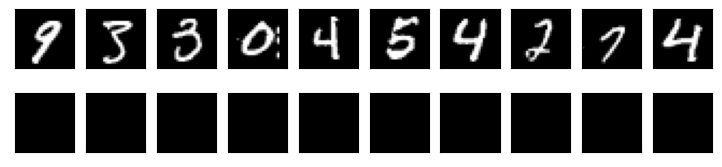

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# 定义自编码器的架构
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        # 编码器
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3)  # 压缩到3个特征，以便于可视化
        )
        # 解码器
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()  # 输出像素值在[0, 1]范围内
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 初始化网络和优化器
autoencoder = Autoencoder()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.005)
criterion = nn.MSELoss()

# 加载MNIST数据集
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

# 训练自编码器
def train(autoencoder, trainloader, epochs=5):
    for epoch in range(epochs):
        for data in trainloader:
            img, _ = data
            img = img.view(img.size(0), -1)
            output = autoencoder(img)
            loss = criterion(output, img)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

train(autoencoder, trainloader)

# 可视化结果
def visualize(autoencoder, trainloader):
    images, _ = next(iter(trainloader))
    images = images.view(images.size(0), -1)
    outputs = autoencoder(images)
    
    plt.figure(figsize=(9, 2))
    for i in range(10):
        # 原始图像
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # 重构图像
        ax = plt.subplot(2, 10, i + 11)
        plt.imshow(outputs[i].detach().numpy().reshape(28, 28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

visualize(autoencoder, trainloader)

自编码器（Autoencoder）是一种在无监督学习中常用的神经网络，主要用于数据的降维或特征学习。它通过训练网络来尝试复制其输入到输出。自编码器内部有一个隐藏层（h）可以产生编码表示输入数据的代码。自编码器的目标是使输出（$\hat{x}$）尽可能接近输入（x），即最小化输入和输出之间的差异。

### 数学背景

自编码器通常由两部分组成：编码器和解码器。

1. **编码器（Encoder）**: 这部分的网络将输入数据（x）映射到隐藏表示（h），可以表示为一个函数 $ h = f(x) $。通常情况下，h 的维度小于 x，这使得编码器能够捕捉输入数据中最重要的特征。

2. **解码器（Decoder）**: 解码器试图从隐藏表示（h）重构输入，表示为 $ \hat{x} = g(h) $。理想情况下，$\hat{x}$ 应该接近原始输入 x。

整个自编码器的目标是最小化重构误差，这通常通过以下损失函数（如均方误差）来实现：

$$ L(x, \hat{x}) = \|\ x - \hat{x} \|\^2 $$

其中，L 是损失函数，x 是原始输入，$\hat{x}$ 是重构输出。

### 变体

自编码器有几种不同的变体：

- **稀疏自编码器（Sparse Autoencoder）**: 在隐藏层引入稀疏性限制，迫使模型学习更有用的数据表示。
- **去噪自编码器（Denoising Autoencoder）**: 通过将噪声添加到输入数据并训练网络恢复原始无噪声数据，使模型更加鲁棒。
- **变分自编码器（Variational Autoencoder, VAE）**: 一种生成模型，不仅学习数据表示，还可以生成新的、与训练数据类似的数据。

### 应用

自编码器的应用包括：

- **数据降维**：类似于PCA，自编码器可以用于降低数据的维度。
- **特征学习**：可以学习到数据的有效表示。
- **数据去噪**：可以从损坏的输入数据中恢复出原始数据。
- **生成模型**：在某些变体中，如VAE，可以生成新的数据实例。

总体来说，自编码器是一种强大的工具，用于学习数据的有效表示，同时在多种不同的应用中展示了其多功能性和有效性。

## IsoMap 等规度映射

等度量映射（Isometric Mapping，简称IsoMap）是一种非线性降维技术，用于在保持数据点之间几何距离的同时降低数据的维度。这种方法尤其适用于那些线性方法（如PCA）无法有效处理的数据集，因为它能够揭示数据内在的非线性结构。

### 基本原理

IsoMap 的核心思想是用低维空间中的点来近似高维空间中的点，同时尽可能保持点之间的几何距离。这是通过以下步骤实现的：

1. **邻域图的构建**：在高维空间中，为每个点找到其最近的`k`个邻居（基于欧氏距离），或者找到所有在给定半径`ε`内的邻居，从而构建一个邻域图。

2. **最短路径计算**：在邻域图中计算每对点之间的最短路径距离（例如使用Dijkstra算法或Floyd-Warshall算法），这些距离被视为高维空间中点之间的几何距离。

3. **多维尺度分析（MDS）**：使用多维尺度分析（MDS）将高维空间中的点映射到低维空间。MDS的目标是在低维空间中重构点，使得点之间的欧氏距离尽可能接近它们在高维空间中的几何距离。

### 数学公式

假设有`n`个高维数据点，我们想将它们映射到`d`维空间（`d`远小于原始数据的维数）。设`D`是一个`n×n`的矩阵，其中`D[i][j]`表示点`i`和点`j`之间的最短路径距离。IsoMap 的目标是找到一个`n×d`的矩阵`Y`，其中`Y[i]`表示点`i`在低维空间中的坐标，以便最小化以下目标函数：

$$ \min_{Y} \sum_{i, j} (D[i][j] - \|Y[i] - Y[j]\|)^2 $$

### 应用和局限性

IsoMap 在许多领域都有应用，如图像处理、生物信息学、语音识别等，尤其在处理那些内在维度较低但在高维空间中表现出复杂结构的数据时非常有效。

但IsoMap 也有其局限性，比如对噪声和异常值比较敏感，而且在计算最短路径时的计算量可能非常大，这限制了它处理大型数据集的能力。此外，选择邻居的数量`k`或半径`ε`对结果也有重要影响，需要根据具体的数据集进行调整。

c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


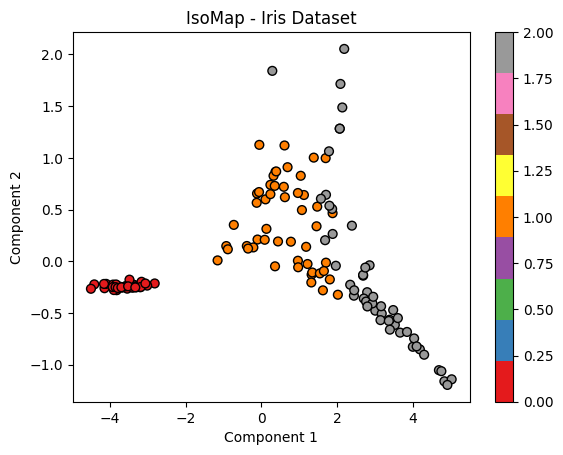

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.manifold import Isomap

iris = load_iris()
X = iris.data
y = iris.target

isomap = Isomap(n_components=2)
X_transformed = isomap.fit_transform(X)

plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k', s=40)
plt.title('IsoMap - Iris Dataset')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()


## t-SNE

t-SNE（t-Distributed Stochastic Neighbor Embedding）是一种非常流行的机器学习算法，用于高维数据的降维和可视化。它由Laurens van der Maaten和Geoffrey Hinton在2008年提出。t-SNE 的主要目的是在低维空间（通常是二维或三维）中表示高维数据，同时保持原始数据中的相似性结构。

### 数学原理

1. **高维空间的概率分布**：t-SNE首先在高维空间中计算数据点之间的相似度。对于高维空间中的每一对数据点 \(x_i\) 和 \(x_j\)，它们之间的相似度被模型为高斯联合概率分布。相似度可以表示为条件概率 \(p_{j|i}\)，即给定数据点 \(x_i\) 的情况下，选择 \(x_j\) 作为其邻居的概率。这个条件概率由下式给出：

   \[ p_{j|i} = \frac{\exp(-||x_i - x_j||^2 / 2\sigma_i^2)}{\sum_{k \neq i} \exp(-||x_i - x_k||^2 / 2\sigma_i^2)} \]

   其中，\(\sigma_i\) 是数据点 \(x_i\) 的高斯分布的标准差，对于不同的点可以有不同的值。

2. **低维空间的概率分布**：在低维空间中，t-SNE同样为每对数据点定义一个相似度。设 \(y_i\) 和 \(y_j\) 是高维空间中 \(x_i\) 和 \(x_j\) 的低维表示，则它们之间的相似度用另一个联合概率分布 \(q_{ij}\) 来表示，该分布基于自由度为1的t分布：

   \[ q_{ij} = \frac{(1 + ||y_i - y_j||^2)^{-1}}{\sum_{k \neq l}(1 + ||y_k - y_l||^2)^{-1}} \]

3. **KL散度和优化**：t-SNE的目标是让两个概率分布尽可能接近。为此，它最小化高维空间和低维空间概率分布之间的Kullback-Leibler（KL）散度。KL散度是两个概率分布之间差异的非对称度量，公式为：

   \[ KL(P||Q) = \sum_i \sum_j p_{ij} \log \frac{p_{ij}}{q_{ij}} \]

   这里，\(P\) 是高维空间中的联合概率分布，而 \(Q\) 是低维空间中的联合概率分布。

通过梯度下降等优化算法最小化KL散度，可以找到每个高维数据点在低维空间的最佳位置。

### 特点和应用

- **非线性降维**：t-SNE非常擅长捕捉高维数据的非线性结构。
- **数据可视化**：t-SNE通常用于高维数据（如图像、文本、基因数据）的可视化。
- **局部结构保留**：t-SNE更关注保留数据的局部结构，而非全局结构。
- **参数敏感**：t-SNE的结果对超参数（如感知 perplexity）的选择敏感。
- **计算代价**：尽管有改进的算法，但t-SNE在处理非常大的数据集时仍可能计算代价较高。

总的来说，t-SNE是一个强大的工具，尤其适合于降维和可视化复杂的高维数据集。

c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\11234\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


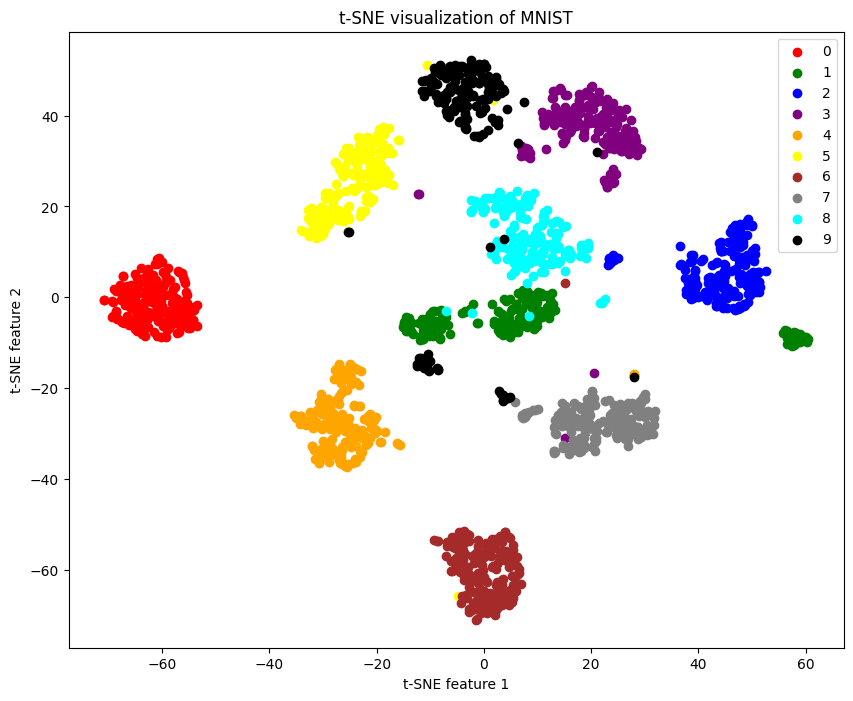

In [3]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.manifold import TSNE

# 加载MNIST数据集
digits = datasets.load_digits()
X = digits.data
y = digits.target

# 使用t-SNE进行降维
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 绘制降维后的数据
plt.figure(figsize=(10, 8))
colors = ['red', 'green', 'blue', 'purple', 'orange', 'yellow', 'brown', 'gray', 'cyan', 'black']
for i in range(len(colors)):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], c=colors[i], label=str(i))
plt.legend()
plt.title('t-SNE visualization of MNIST')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()
